In [2]:
import pandas as pd

df = pd.read_excel("Datasets/Raisin_Dataset.xlsx")
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
345,75540,422.098490,237.638677,0.826461,78465,0.705085,1114.880,Kecimen
485,85492,437.013969,250.892609,0.818781,89018,0.723344,1182.575,Besni
764,76551,394.442615,255.254441,0.762382,81613,0.632365,1130.405,Besni
119,79532,367.526006,277.224162,0.656532,81603,0.735114,1075.271,Kecimen
82,58650,346.338958,219.684365,0.773083,62380,0.660287,991.612,Kecimen


<Axes: >

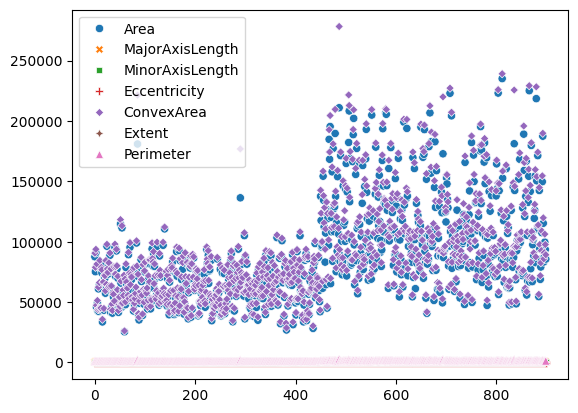

In [28]:
import seaborn as sns 

sns.scatterplot(df)

In [4]:
df.shape

(900, 8)

In [22]:
X=df.iloc[:, :-1]
y=df["Class"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [29]:
from sklearn.svm import SVC

model=SVC(kernel="rbf")
model.fit(X_train,y_train)

model.n_iter_

array([229], dtype=int32)

In [25]:
y_pred=model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

report=classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

       Besni       0.86      0.75      0.80        83
     Kecimen       0.81      0.90      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180



In [27]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_ #how much iterations needed?

              precision    recall  f1-score   support

       Besni       0.91      0.88      0.90        83
     Kecimen       0.90      0.93      0.91        97

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



array([85005907], dtype=int32)

What happens when we do standardization?

In [30]:
# Train Independent Feature would be standarized

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([382], dtype=int32)

In [33]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.90      0.84      0.87        83
     Kecimen       0.87      0.92      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([1214], dtype=int32)

So, After standardization accuracy changes .... in this case rbf and linear became same after standardization

### Making Works Easier with **Pipeline**

In [34]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
    ("scaler",StandardScaler()),
    ("svm",SVC())
])

In [ ]:
#from sklearn.pipeline import Pipeline

#pipeline = Pipeline([
    #("scaler", MinMaxScaler()),
    
    #("Support Vector Machine", SVC(kernel="rbf"))
#])

In [35]:
pipeline.fit(X_train,y_train)

y_pred=pipeline.predict(X_test)

In [36]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

